### Pandas = Panel Datas 
= Series나 table 형태로 데이터를 나타낼 수 있다. 이러한 데이터를 다루기 위한 클래스를 제공하는 패키지  
### Series class
= NumPy에서 제공하는 1차원 배열과 그 모양이 비슷하다. 하지만 배열과 다르게 index를 추가하여 index 와 value를 가지는 배열을 말한다.  
- Series 객체 생성시 첫 인수로 data, 두 번째 인수로 idnex를 넣는다. 
- data값으로 iterable,배열,scalar value, dict(key와 index를 동일하게 사용하거나 생략)를 사용할 수 있다. 
- index는 data와 length가 동일해야한다.
- index는 hashable한 type만 올 수 있다.

In [5]:
import pandas as pd
series = pd.Series(['one','two','three',"four","five","six","seven",'eight','nine','ten'],index=range(1,11))
print(series)

1       one
2       two
3     three
4      four
5      five
6       six
7     seven
8     eight
9      nine
10      ten
dtype: object


In [12]:
s = pd.Series([9_904_312, 3_448_737, 2_890_451, 2_466_052],
              index=["서울", "부산", "인천", "대구"])
print(s,end="\n\n")
print(s.index)
print(s.values,end='\n\n')
s.name = "인구"
s.index.name = "도시"
print(s)

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

Index(['서울', '부산', '인천', '대구'], dtype='object')
[9904312 3448737 2890451 2466052]

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64


### dict로 Series생성하기

In [19]:
d = {'a':1,'b':2,'c':3}
ser = pd.Series(d) # 또는 ser = pd.Series(data=d,index=d.keys())
print(ser)
ser = pd.Series(data=d,index=['x','y','z']) 
# index로 주어진 값의 key값에 대응하는 value값을 주기 때문에 없는값이라서 NaN을 넣어준다.
print(ser)

a    1
b    2
c    3
dtype: int64
x   NaN
y   NaN
z   NaN
dtype: float64


### Series index를 속성처럼 활용하기
- index 값이 영문 문자열인 경우에는 index label이 속성인것처럼 마침표(.)를 활용하여 해당 index값에 접근 가능

In [33]:
ser.x

nan

### Series의 특징
- 딕셔너리 자료형과 비슷한 특징을 가짐
- in연산가능
- items()메서드를 사용해 각 요소의 key,value에 접근 가능
- 딕셔너리의 원소는 순서를 가지지 않으므로 시리즈의 데이터도 순서가 보장되지 않는다. 
  만약 순서를 가지도록 하기 위해서는 Series선언시에 index에서 리스트로 순서를 지정해주어야한다.

In [38]:
print("서울" in s)
print("대전" in s)
for k,v in s.items():
    print(k,":",v)

True
False
서울 : 9904312
부산 : 3448737
인천 : 2890451
대구 : 2466052


### indexing + slicing

In [39]:
print(s[0], s[1], s['인천'],end="\n\n")
print(s[[0,3,1]],end="\n\n")
print(s[1:2],end="\n\n") # 끝값 [2]포함하지 않는다.
print(s['부산':'대구'],end="\n\n") # 끝값(대구)도 포함한다.
#문자는 초과하는 범위를 표현할 수 없어서 (초과하는 문자가 뭐냐고 물어보면 답할수가 없음) 끝을 포함시킨다는 다른점이 있다.
print(s[(250e4 < s) & (s < 500e4)],end="\n\n")  # 인구가 250만 초과, 500만 미만인 경우

9904312 3448737 2890451

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

도시
부산    3448737
Name: 인구, dtype: int64

도시
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64



### 시리즈 연산

- 다만 values에만 연산이 적용되고 index는 변하지 않는다.
- 시리즈끼리 연산을 하는 경우 인덱스가 같은 데이터에 대해서만 차이를 구한다.


In [63]:
print(s/10000,end ='\n\n')
sd = pd.Series([55546,272830,258416,1490158],index = ['부산','서울','인천','대전'])
ds = s-sd
print(ds,end ='\n\n')
print(ds.notnull(),end ='\n\n') # NaN값에 대한 여부를 확인가능
print(ds[ds.notnull()],end ='\n\n')#notnull()응용
# NaN 값을 갖기 위해선 자료형이 float형이어야 해서 int끼리 연산해도 float형으로 저장된다.

도시
서울    990.4312
부산    344.8737
인천    289.0451
대구    246.6052
Name: 인구, dtype: float64

대구          NaN
대전          NaN
부산    3393191.0
서울    9631482.0
인천    2632035.0
dtype: float64

대구    False
대전    False
부산     True
서울     True
인천     True
dtype: bool

부산    3393191.0
서울    9631482.0
인천    2632035.0
dtype: float64



In [64]:
print(ds)
del ds['대구']
del ds['대전']
ds['부산'] = 0
ds

대구          NaN
대전          NaN
부산    3393191.0
서울    9631482.0
인천    2632035.0
dtype: float64


부산          0.0
서울    9631482.0
인천    2632035.0
dtype: float64

In [97]:
fin1 = {'카카오':60010,'삼성전자':61000,'LG전자':90000}
fin2_value = [60200,61200,200100]
fi2_index = ['카카오','삼성전자','네이버']

ser_finance1 = pd.Series(fin1) 
ser_finance2 = pd.Series(data = fin2_value, index = fi2_index)
print(ser_finance1,ser_finance2,sep="\n\n",end = "\n\n")

result = ser_finance1 - ser_finance2
print(result[result.notnull()])

카카오     60010
삼성전자    61000
LG전자    90000
dtype: int64

카카오      60200
삼성전자     61200
네이버     200100
dtype: int64

삼성전자   -200.0
카카오    -190.0
dtype: float64


# <font color=FFE536>DataFrame</front>
- 2차원 array에 index값을 붙인 형태와 비슷하다.
- 행 index 뿐만 아니라 열 index도 따로 지정이 가능하다.
- 데이터프레임은 전치(transpose)를 포함하여 2차원 array가 가지는 대부분의 속성이나 메서드를 지원한다.
### DataFame 생성
1. 하나의 열이 되는 데이터를 리스트나 일차원 배열을 준비한다.
2. 각각의 열에 대한 이름(label)을 키로 가지는 dictionary를 만든다
3. 이 데이터를 DataFrame 클래스 생성자에 넣는다. 동시에 열방향 index는 columns 인수로 행방향 index는 index인수로 지정한다.

In [115]:
data = {
    "빨강": ['ff3399', 'ff1999', 'f5007a', 'ff1493'],
    "노랑": ['ffe536', 'ffff00', 'ffd700', 'ebd64a'],
    "초록": ['36ffb4', '1dffba', '00f79b', '00fa9a'],
    "파랑": ['003dfd', '4682b4', '00bcf8', '148cb2'],
    "가격": [1000.0,1000.0,1000.0,1000.0]
}
color_pen = pd.DataFrame(data,index=range(1,5))
color_pen.name = "형광펜색"
color_pen.index.name = '순서'
color_pen.columns.name = '색'
print(color_pen)
print(color_pen.name)

색       빨강      노랑      초록      파랑      가격
순서                                        
1   ff3399  ffe536  36ffb4  003dfd  1000.0
2   ff1999  ffff00  1dffba  4682b4  1000.0
3   f5007a  ffd700  00f79b  00bcf8  1000.0
4   ff1493  ebd64a  00fa9a  148cb2  1000.0
형광펜색


In [105]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns)
print(df)
df

     지역     2015     2010     2005     2000  2010-2015 증가율
서울  수도권  9904312  9631482  9762546  9853972         0.0283
부산  경상권  3448737  3393191  3512547  3655437         0.0163
인천  수도권  2890451  2632035  2517680  2466338         0.0982
대구  경상권  2466052  2431774  2456016  2473990         0.0141


,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [69]:
df.values

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [73]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [75]:
df.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [82]:
# index와 column에 이름을 붙이는 것도 가능하다 
df.index.name = "도시"
df.columns.name = "특성"
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [106]:
df['2005-2010 증가율'] = ((df['2010']-df['2005']) / df['2005']*100).round(3)
del df['2010-2015 증가율']
df

,지역,2015,2010,2005,2000,2005-2010 증가율
서울,수도권,9904312,9631482,9762546,9853972,-1.343
부산,경상권,3448737,3393191,3512547,3655437,-3.398
인천,수도권,2890451,2632035,2517680,2466338,4.542
대구,경상권,2466052,2431774,2456016,2473990,-0.987


### 열 인덱싱
- column label을 key로 인덱싱이 가능하다.
- 인덱싱한 type은 Series이다.
- label을 배열 또는 여러개의 열을 indexing하면 DataFrame type이 된다.
- 만약 하나의 열만 빼내면서 데이터프레임 자료형을 유지하고 싶다면 원소가 하나인 리스트를 써서 인덱싱하면 된다.
- column index가 문자열 label인 경우에는 순서를 나타내느 정수 index를 column인덱싱에 사용할 수 없다.
- 원래부터 정수형 column index를 가지는 경우에는 index값으로 정수를 사용할 수 있다.

In [124]:
print(df)
print(df['2010'] , type(df['지역']),sep="\n")# series type 
print(df[['2010','2005']], type(df[['2010','2005']]),sep="\n") # DataFrame type
print(df[['2010']], type(df[["2010"]]),sep='\n') #DataFrame type
# print(df[0]) #얘는 에러가 난다.

     지역     2015     2010     2005     2000  2005-2010 증가율
서울  수도권  9904312  9631482  9762546  9853972         -1.343
부산  경상권  3448737  3393191  3512547  3655437         -3.398
인천  수도권  2890451  2632035  2517680  2466338          4.542
대구  경상권  2466052  2431774  2456016  2473990         -0.987
서울    9631482
부산    3393191
인천    2632035
대구    2431774
Name: 2010, dtype: int64
<class 'pandas.core.series.Series'>
       2010     2005
서울  9631482  9762546
부산  3393191  3512547
인천  2632035  2517680
대구  2431774  2456016
<class 'pandas.core.frame.DataFrame'>
       2010
서울  9631482
부산  3393191
인천  2632035
대구  2431774
<class 'pandas.core.frame.DataFrame'>


### DataFrame row 슬라이싱
- row 단위로 인덱싱을 하고자 하면 항상 슬라이싱을 해야한다.
- idnex값이 문자 label이라면 label 슬라이싱도 가능하다.

In [135]:
print(df[:1]) # 서울은 df에서 index가 '서울' 이자 0 이다.
print(df[:'서울'], type(df[:'서울']),sep = "\n") #반환 type은 DataFrame이 된다.

     지역     2015     2010     2005     2000  2005-2010 증가율
서울  수도권  9904312  9631482  9762546  9853972         -1.343
     지역     2015     2010     2005     2000  2005-2010 증가율
서울  수도권  9904312  9631482  9762546  9853972         -1.343
<class 'pandas.core.frame.DataFrame'>


### 개별 데이터 인덱싱
- DataFrame에서 열 라벨로 시리즈를 인덱싱하고 이를 다시 행 라벨로 인덱싱하면 개별 데이터가 나온다.
- 반대순서로 인덱싱을 짜면 KeyError가 발생한다. 행 라벨 인덱싱은 무조건 DataFrame형태로 데이터가 나오기 때문임.

### DataFrame 인덱싱정리사진 
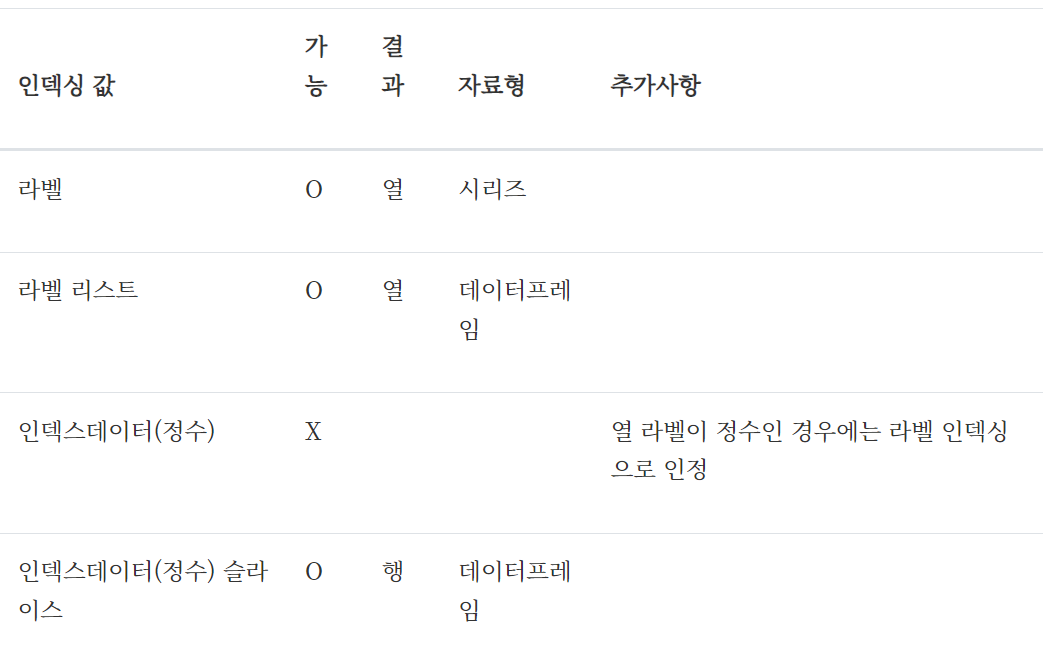


In [132]:
df['2015']['서울']

9904312

In [210]:
data = {
    "국어": [80, 90, 70, 30],
    "영어": [90, 70, 60, 40],
    "수학": [90, 60, 80, 70],
}
columns = ["국어", "영어", "수학"]
index = ["춘향", "몽룡", "향단", "방자"]
df = pd.DataFrame(data, index=index, columns=columns)

# 방자의 영어값을 바꾸고 평균을 구해라
df['영어']['방자'] = 80
df['평균'] = ((df['국어']+df['영어']+df['수학'])/3).round(2)
print(df)

# '향단' 의 점수를 Series 형태로 출력해라 (그냥 행 slicing하면 DataFrame type임.)
ser = pd.Series([df['국어']['향단'],df['영어']['향단'],df['수학']['향단'],df['평균']['향단']],index =['국어','영어','수학','평균'])
ser.name = '향단'
print(ser)
print(df.T['향단'])
print(type(df.T['향단']))

    국어  영어  수학     평균
춘향  80  90  90  86.67
몽룡  90  70  60  73.33
향단  70  60  80  70.00
방자  30  80  70  60.00
국어    70.0
영어    60.0
수학    80.0
평균    70.0
Name: 향단, dtype: float64
국어    70.0
영어    60.0
수학    80.0
평균    70.0
Name: 향단, dtype: float64
<class 'pandas.core.series.Series'>


In [224]:
import numpy as np
np.random.seed(0)
value = np.random.randn(6,4)
pd.DataFrame(value,index = pd.date_range("20130226",periods=6),columns =list('ABCD') )

,A,B,C,D
2013-02-26,1.764052,0.400157,0.978738,2.240893
2013-02-27,1.867558,-0.977278,0.950088,-0.151357
2013-02-28,-0.103219,0.410599,0.144044,1.454274
2013-03-01,0.761038,0.121675,0.443863,0.333674
2013-03-02,1.494079,-0.205158,0.313068,-0.854096
2013-03-03,-2.552990,0.653619,0.864436,-0.742165
